### 다음달 매출 예측 (요일,시간기반 매출 분석, 제품별 top 판매 제품, 다음달 top 매출 아이템 판매량 예측)

---
### 요일 및 시간 기반의 메뉴 트렌드 분석


*   각 요일에 가장 인기있는 메뉴 분석
*   현재 쌓인 데이터를 토대로 다음 한 주간의 각 요일별 메뉴 트렌드 분석




### 데이터불러오기

In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화

# 데이터 불러오기
# 예를 들어, 데이터가 CSV 파일로 저장되어 있다면
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/아워홈 사전과제/참고_-데이터분석_사전과제-data.csv')

# 데이터의 처음 몇 행 확인
df.head(3)

,날짜,메뉴,포스번호,영수번호,시간,수량,매출,메뉴번호,요일,날씨
0,20221125,[40863]캬라멜팝콘(M),2,73,1956,1,5000,40863,금,비
1,20221030,[40860]컵와인 까베르네소비뇽,1,293,1912,2,18182,40860,일,맑음
2,20221109,[00413]아이스 아메리카노(Ice Coffee),1,43,1931,1,4545,413,수,흐림


In [2]:
# 데이터의 기본 정보 확인
df.info()

# 수치형 변수에 대한 기술 통계량 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      40000 non-null  int64 
 1   메뉴      40000 non-null  object
 2   포스번호    40000 non-null  int64 
 3   영수번호    40000 non-null  int64 
 4   시간      40000 non-null  int64 
 5   수량      40000 non-null  int64 
 6   매출      40000 non-null  int64 
 7   메뉴번호    40000 non-null  int64 
 8   요일      40000 non-null  object
 9   날씨      40000 non-null  object
dtypes: int64(7), object(3)
memory usage: 3.1+ MB
                 날짜          포스번호          영수번호            시간            수량  \
count  4.000000e+04  40000.000000  40000.000000  40000.000000  40000.000000   
mean   2.022141e+07      2.774200    132.365800   1734.953275      1.220375   
std    1.493755e+03      1.446813    107.104122    249.958838      0.816686   
min    2.022102e+07      1.000000      1.000000   1029.000000      1.000000   
25%    2.02211

### 전처리

In [3]:
# 열 삭제
df = df.drop(['포스번호','영수번호','메뉴번호','날씨','날짜','시간'], axis=1)

In [4]:
df.head(3)

,메뉴,수량,매출,요일
0,[40863]캬라멜팝콘(M),1,5000,금
1,[40860]컵와인 까베르네소비뇽,2,18182,일
2,[00413]아이스 아메리카노(Ice Coffee),1,4545,수


### EDA

In [5]:
# 결측치 확인
print(df.isnull().sum())

메뉴    0
수량    0
매출    0
요일    0
dtype: int64


In [6]:
#이상치 확인

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


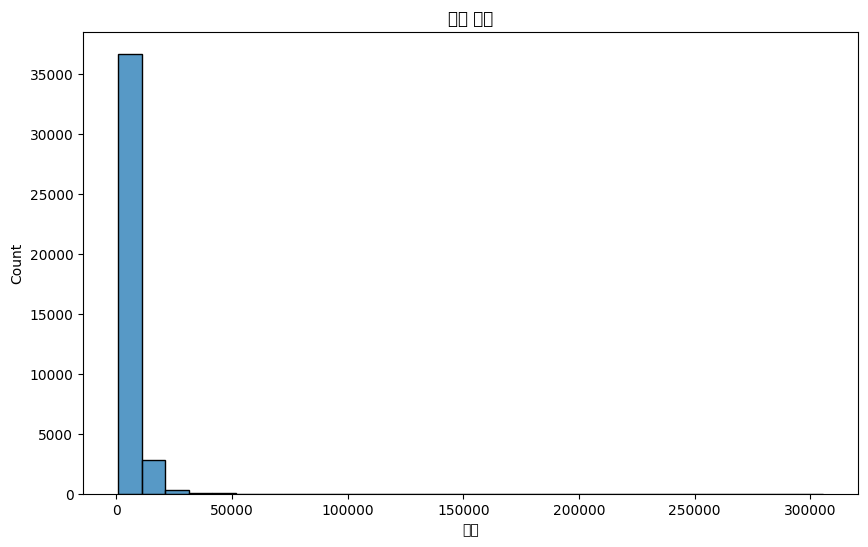

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df['매출'], bins=30)
plt.title('매출 분포')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

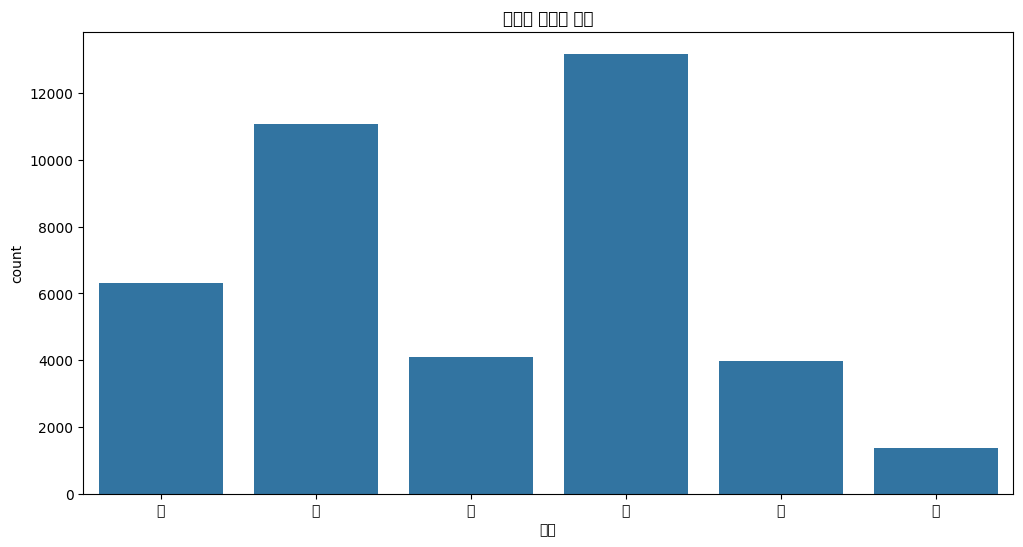

In [8]:
# 카테고리별 분포 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x='요일', data=df)
plt.title('요일별 데이터 분포')
plt.show()

### 분석

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

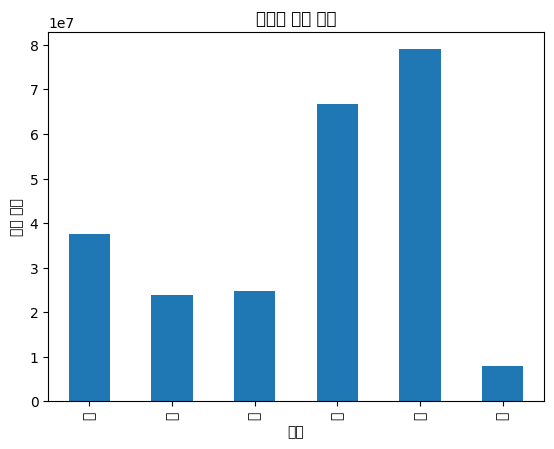

In [9]:
# 요일별 매출 합산
weekday_sales = df.groupby('요일')['매출'].sum()

# 요일별 매출 시각화
weekday_sales.plot(kind='bar')
plt.xlabel('요일')
plt.ylabel('매출 합계')
plt.title('요일별 매출 분석')
plt.show()

In [10]:
top_selling=df.groupby('메뉴')['수량'].sum()

# 결과를 데이터프레임으로 변환하고 수량을 기준으로 내림차순 정렬
menu_quantity_sum_df = top_selling.reset_index().sort_values(by='수량', ascending=False)

# 상위 10개 메뉴 출력
top_10_menu = menu_quantity_sum_df.head(10)

print('판매 수량 상위 10개 제품:')
print(top_10_menu)

판매 수량 상위 10개 제품:
                              메뉴    수량
11                    [15867]츄러스  8408
10                     [14097]생수  7736
26               [40863]캬라멜팝콘(M)  7442
14                  [32291]코카콜라   2714
27              [40864]캬라멜 팝콘(L)  2337
20                [40857]클라우드(캔)  2019
1   [00413]아이스 아메리카노(Ice Coffee)  1734
7                   [09175]뉴욕핫도그  1698
0        [00410]아메리카노(Americano)  1522
32           [40869]Couple set A  1386


In [11]:
top_selling=df.groupby('메뉴')['매출'].sum()

# 결과를 데이터프레임으로 변환하고 수량을 기준으로 내림차순 정렬
menu_quantity_sum_df = top_selling.reset_index().sort_values(by='매출', ascending=False)

# 상위 10개 메뉴 출력
top_10_menu = menu_quantity_sum_df.head(10)

print('매출 상위 10개 제품:')
print(top_10_menu)

매출 상위 10개 제품:
                              메뉴        매출
11                    [15867]츄러스  38216071
26               [40863]캬라멜팝콘(M)  37210000
27              [40864]캬라멜 팝콘(L)  21245667
32           [40869]Couple set A  20159443
7                   [09175]뉴욕핫도그  10805806
20                [40857]클라우드(캔)  10095000
17                  [34433]순살닭강정   9469386
14                  [32291]코카콜라    8635883
35            [40878]Single set    7900079
1   [00413]아이스 아메리카노(Ice Coffee)   7881296


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47700 (\N{HANGUL SYLLABLE ME}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils

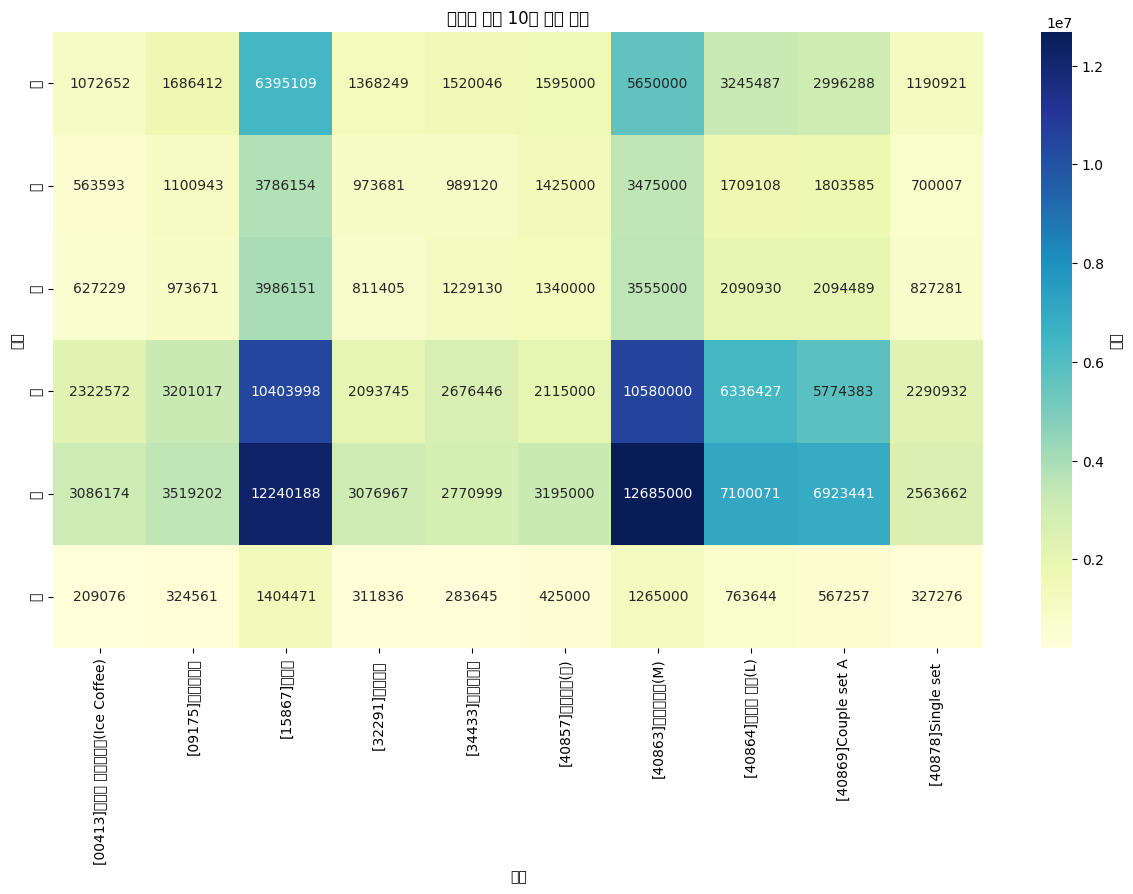

In [12]:
#매출 상위 10개의 메뉴들이 각각 요일별로 얼마나 판매되느냐

# 매출 상위 10개 제품 선택
top_10_products = df.groupby('메뉴')['매출'].sum().nlargest(10).index
df_top_10 = df[df['메뉴'].isin(top_10_products)]

# 요일별 상위 10개 메뉴 매출 표 생성
pivot_table = pd.pivot_table(df_top_10, values='매출', index='요일', columns='메뉴', aggfunc='sum', fill_value=0)

# 시각화 (히트맵)
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': '매출'})
plt.title('요일별 상위 10개 메뉴 매출')
plt.show()

### 모델링

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52740 (\N{HANGUL SYLLABLE CYU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52908 (\N{HANGUL SYLLABLE KYA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missi

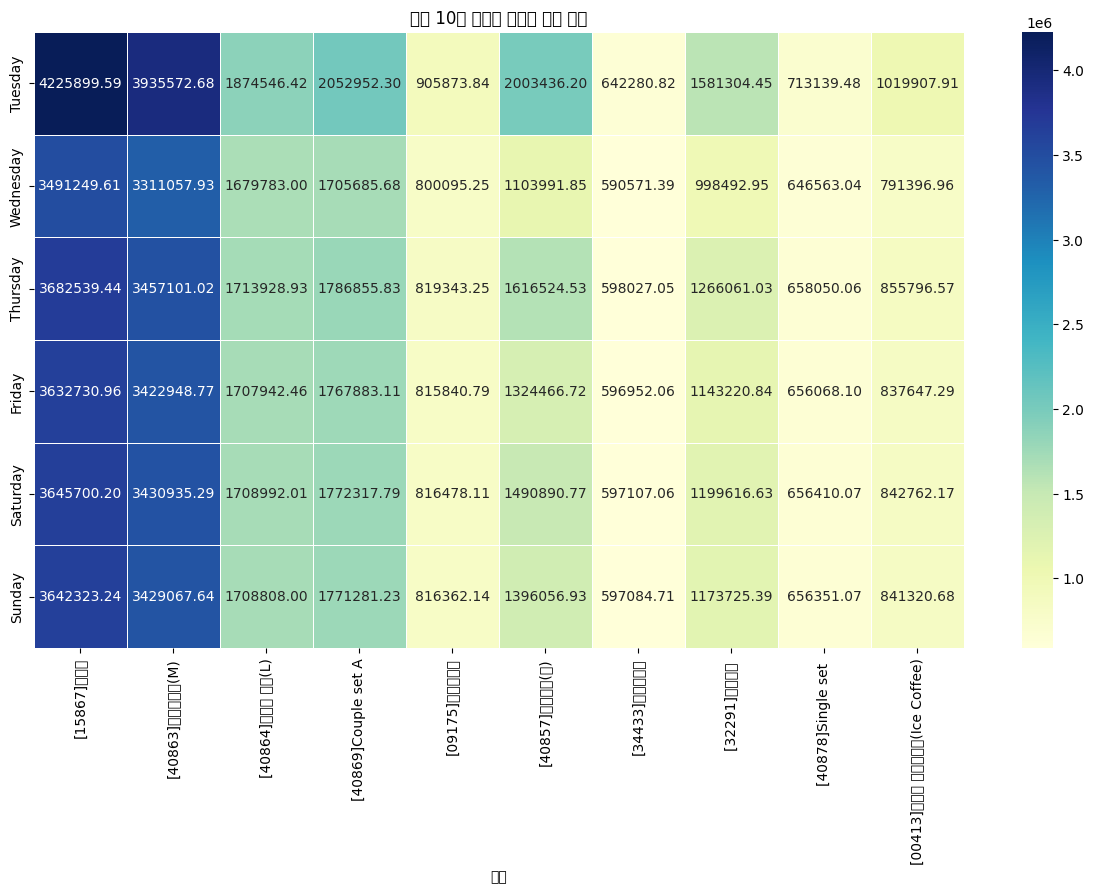

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import calendar

# 매출 상위 10개 제품 선택
top_10_products = df.groupby('메뉴')['매출'].sum().nlargest(10).index
df_top_10 = df[df['메뉴'].isin(top_10_products)]

# 시각화를 위한 데이터프레임 초기화
forecast_data = pd.DataFrame(index=calendar.day_name, columns=top_10_products)

# 월요일을 제외한 인덱스 설정
forecast_data = forecast_data[forecast_data.index != 'Monday']

# 각 메뉴에 대한 ARIMA 모델 적용 및 예측
for menu in top_10_products:

    # 요일별 상위 10개 메뉴 매출 표 생성
    pivot_table = pd.pivot_table(df_top_10[df_top_10['메뉴'] == menu], values='매출', index='요일', aggfunc='sum', fill_value=0)

    # ARIMA 모델 학습
    model = ARIMA(pivot_table.values, order=(1, 1, 0))  # p, d, q는 적절한 값으로 설정
    result = model.fit()

    # 향후 6일 동안의 예측
    forecast_steps = 6
    forecast = result.get_forecast(steps=forecast_steps)

    # 예측 결과를 데이터프레임에 추가
    forecast_data[menu] = forecast.predicted_mean

# 시각화 (히트맵)
plt.figure(figsize=(15, 8))
sns.heatmap(forecast_data, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('상위 10개 메뉴의 요일별 매출 예측')
plt.show()


In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 예측 결과와 실제 값 가져오기
predicted_values = forecast.predicted_mean
actual_values = pivot_table

# RMSE 계산
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f'RMSE: {rmse}')

RMSE: 1136115.5382396525
